In [1]:
# ! pip install scrublet

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scanpy.external as sce
import sys
import scipy 

In [3]:
adata = sc.read_h5ad('calu3.h5ad')

In [4]:
adata.var_names_make_unique()

In [5]:
adata.obs['cell_type'].unique()

['cultured cell']
Categories (1, object): ['cultured cell']

In [6]:
adata.obs.head(2)

,orig.ident,nCount_RNA,nFeature_RNA,infect,strain,nCount_Unspliced,nFeature_Unspliced,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,...,donor_id,suspension_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage
Calu3-S1-12h-A_AAAACGAAGCTG,Calu3-S1-12h-A,1399.0,1001,infected,SARSCoV1,1176.0,861,1001,6.909753,2265.772705,...,Calu-3,cell,cultured cell,Drop-seq,severe acute respiratory syndrome,Homo sapiens,male,epithelial cell of lung (cell culture),unknown,unknown
Calu3-S1-12h-A_AAAACGTGTGTT,Calu3-S1-12h-A,2580.0,1425,infected,SARSCoV1,2082.0,1216,1425,7.262629,2597.423340,...,Calu-3,cell,cultured cell,Drop-seq,severe acute respiratory syndrome,Homo sapiens,male,epithelial cell of lung (cell culture),unknown,unknown


In [7]:
adata.var.head(2)

,feature_is_filtered,feature_name,feature_reference,feature_biotype
feature_id,,,,
ENSG00000146038,False,DCDC2,NCBITaxon:9606,gene
ENSG00000136536,False,MARCHF7,NCBITaxon:9606,gene


## select s2 only

In [8]:
adata = adata[adata.obs["strain"] != "SARSCoV1"]
adata = adata[adata.obs.query("strain != 'SARSCoV1'").index]
adata = adata[[r != "SARSCoV1" for r in adata.obs.strain]]
adata.obs.strain.unique()

['nan', 'SARSCoV2']
Categories (2, object): ['SARSCoV2', 'nan']

In [9]:
conditions = []
for i in range(len(adata.obs.index)):
    conditions.append(adata.obs.index[i].split('-')[1:3])
set(tuple(row) for row in conditions)

{('S2', '12h'), ('S2', '4h'), ('S2', '8h'), ('mock', '12h'), ('mock', '4h')}

## retrieve raw counts

In [10]:
adata.X = adata.raw.X 

## create count matrix

In [11]:
#genes = list(adata.var['feature_name'].values)
#counts = adata[:, adata.var['feature_name'].isin(genes)].to_df() 

/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


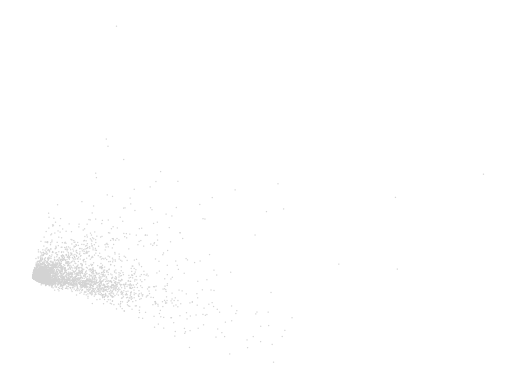

In [12]:
sc.tl.pca(adata) 
sc.pl.pca(adata, frameon=False)

/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/s

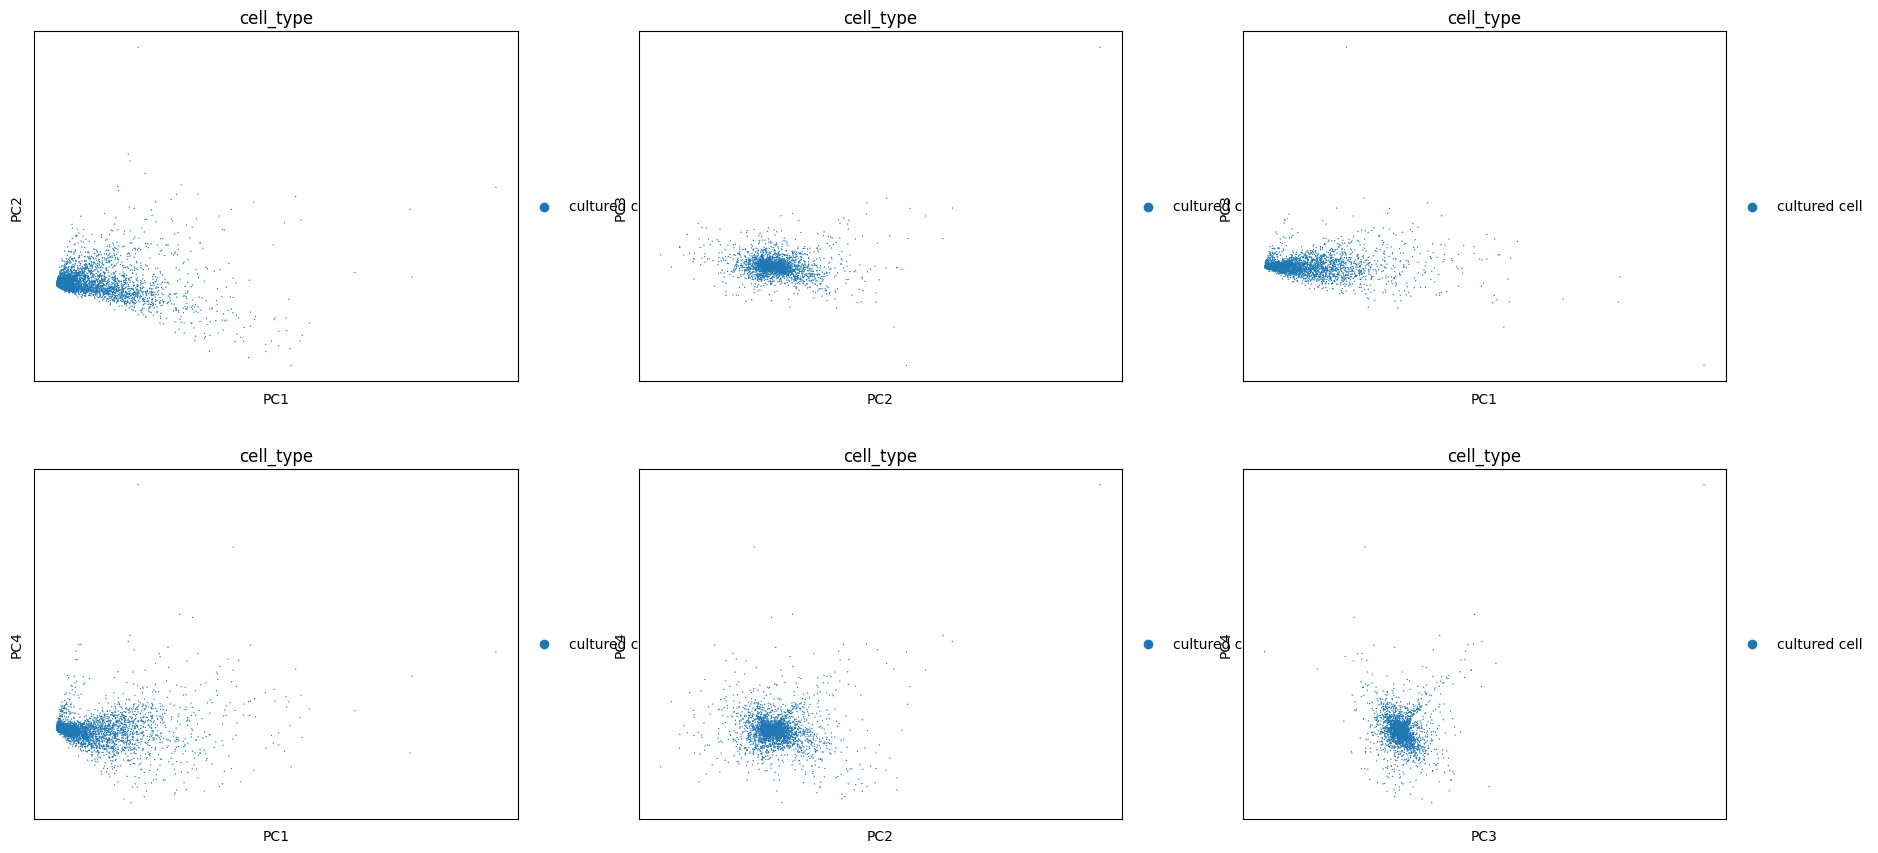

In [13]:
sc.pl.pca(adata, color=["cell_type"], components = ['1,2','2,3','1,3','1,4','2,4','3,4'], ncols=3)

In [14]:
adata.obs.head(2)

,orig.ident,nCount_RNA,nFeature_RNA,infect,strain,nCount_Unspliced,nFeature_Unspliced,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,...,donor_id,suspension_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage
Calu3-mock-12h-A_AAAAATCCCTAG,Calu3-mock-12h-A,1467.0,1050,uninf,nan,1269.0,931,1050,6.957497,2334.701416,...,Calu-3,cell,cultured cell,Drop-seq,normal,Homo sapiens,male,epithelial cell of lung (cell culture),unknown,unknown
Calu3-mock-12h-A_AAAACATACTTA,Calu3-mock-12h-A,1905.0,1271,uninf,nan,1592.0,1117,1271,7.148346,2568.509033,...,Calu-3,cell,cultured cell,Drop-seq,normal,Homo sapiens,male,epithelial cell of lung (cell culture),unknown,unknown


/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<AxesSubplot: title={'center': 't-SNE'}, xlabel='tSNE1', ylabel='tSNE2'>

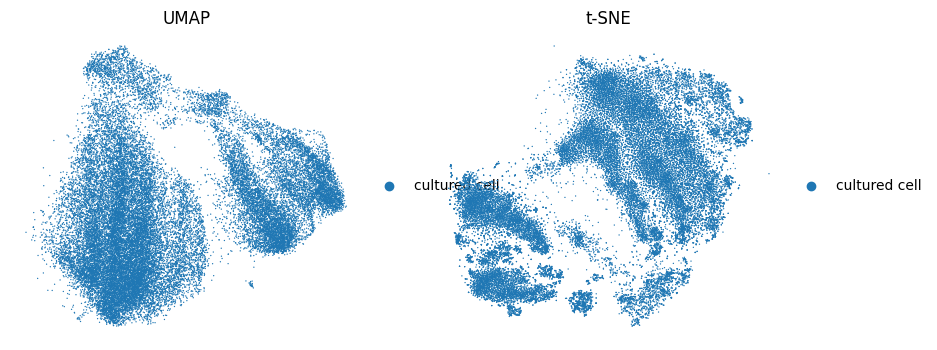

In [15]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
sc.pl.umap(adata, frameon=False, ax=axs[0], color=["cell_type"], title="UMAP", show=False) # Отрисовываем UMAP
sc.pl.tsne(adata, frameon=False, ax=axs[1], color=["cell_type"], title="t-SNE", show=False) # Отрисовываем t-SNE

In [16]:
adata.obs['condition'] = adata.obs.index.str.split('-').str[1]
adata.obs['hpi'] = adata.obs.index.map(lambda x: x.split('-')[2].strip().replace("h","") if len(x.split('-'))>1 else None)

In [17]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,infect,strain,nCount_Unspliced,nFeature_Unspliced,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,...,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,condition,hpi
Calu3-mock-12h-A_AAAAATCCCTAG,Calu3-mock-12h-A,1467.0,1050,uninf,nan,1269.0,931,1050,6.957497,2334.701416,...,cultured cell,Drop-seq,normal,Homo sapiens,male,epithelial cell of lung (cell culture),unknown,unknown,mock,12
Calu3-mock-12h-A_AAAACATACTTA,Calu3-mock-12h-A,1905.0,1271,uninf,nan,1592.0,1117,1271,7.148346,2568.509033,...,cultured cell,Drop-seq,normal,Homo sapiens,male,epithelial cell of lung (cell culture),unknown,unknown,mock,12
Calu3-mock-12h-A_AAAACATGTCAA,Calu3-mock-12h-A,2156.0,1403,uninf,nan,1808.0,1239,1403,7.247081,2725.995361,...,cultured cell,Drop-seq,normal,Homo sapiens,male,epithelial cell of lung (cell culture),unknown,unknown,mock,12
Calu3-mock-12h-A_AAAACCAGACTA,Calu3-mock-12h-A,3418.0,2063,uninf,nan,2507.0,1650,2063,7.632401,3297.717041,...,cultured cell,Drop-seq,normal,Homo sapiens,male,epithelial cell of lung (cell culture),unknown,unknown,mock,12
Calu3-mock-12h-A_AAAACTCTAGCG,Calu3-mock-12h-A,2311.0,1378,uninf,nan,1889.0,1210,1378,7.229114,2618.069824,...,cultured cell,Drop-seq,normal,Homo sapiens,male,epithelial cell of lung (cell culture),unknown,unknown,mock,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Calu3-mock-4h-B_TTTTCGTTTGTG,Calu3-mock-4h-B,3873.0,1901,infected,nan,3108.0,1671,1901,7.550661,3033.565186,...,cultured cell,Drop-seq,normal,Homo sapiens,male,epithelial cell of lung (cell culture),unknown,unknown,mock,4
Calu3-mock-4h-B_TTTTGGAATGGT,Calu3-mock-4h-B,54939.0,7926,infected,nan,15378.0,4863,7926,8.978030,4629.885254,...,cultured cell,Drop-seq,normal,Homo sapiens,male,epithelial cell of lung (cell culture),unknown,unknown,mock,4
Calu3-mock-4h-B_TTTTGGCACGAC,Calu3-mock-4h-B,41645.0,7619,infected,nan,14697.0,5007,7619,8.938532,4656.414062,...,cultured cell,Drop-seq,normal,Homo sapiens,male,epithelial cell of lung (cell culture),unknown,unknown,mock,4
Calu3-mock-4h-B_TTTTTGCGATAA,Calu3-mock-4h-B,2291.0,1322,infected,nan,1891.0,1177,1322,7.187657,2588.040527,...,cultured cell,Drop-seq,normal,Homo sapiens,male,epithelial cell of lung (cell culture),unknown,unknown,mock,4


/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<AxesSubplot: title={'center': 't-SNE'}, xlabel='tSNE1', ylabel='tSNE2'>

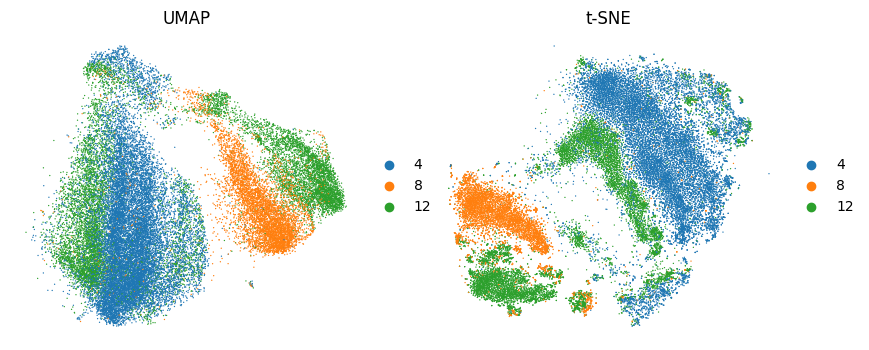

In [18]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
sc.pl.umap(adata, frameon=False, ax=axs[0], color=["hpi"], title="UMAP", show=False) # Отрисовываем UMAP
sc.pl.tsne(adata, frameon=False, ax=axs[1], color=["hpi"], title="t-SNE", show=False) # Отрисовываем t-SNE


/opt/homebrew/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<AxesSubplot: title={'center': 't-SNE'}, xlabel='tSNE1', ylabel='tSNE2'>

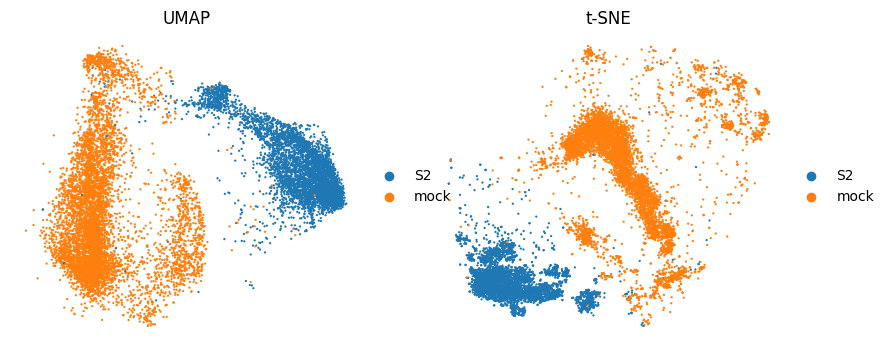

In [19]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))

sc.pl.umap(adata[adata.obs['hpi'] == '12'], frameon=False, ax=axs[0], color=["condition"], title="UMAP", show=False) # Отрисовываем UMAP
sc.pl.tsne(adata[adata.obs['hpi'] == '12'], frameon=False, ax=axs[1], color=["condition"], title="t-SNE", show=False) # Отрисовываем t-SNE

In [20]:
#sc.pl.pca(adata, color=["condition"], components = ['1,2','2,3','1,3','1,4','2,4','3,4'], ncols=3)

In [21]:
#sc.pl.pca(adata, color=["hpi"], components = ['1,2','2,3','1,3','1,4','2,4','3,4'], ncols=3)

In [22]:
#sc.pl.pca(adata[adata.obs['hpi'] == '12'], color=["condition"], components = ['1,2','2,3','1,3','1,4','2,4','3,4'], ncols=3)

/opt/homebrew/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.

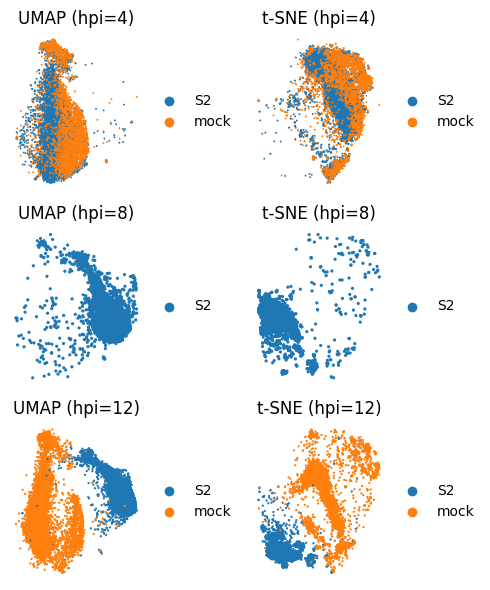

In [23]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(5, 6))

sc.pl.umap(adata[adata.obs['hpi'] == '4'], frameon=False, ax=axs[0, 0], color=["condition"], title="UMAP (hpi=4)", show=False) 
sc.pl.tsne(adata[adata.obs['hpi'] == '4'], frameon=False, ax=axs[0, 1], color=["condition"], title="t-SNE (hpi=4)", show=False)

sc.pl.umap(adata[adata.obs['hpi'] == '8'], frameon=False, ax=axs[1, 0], color=["condition"], title="UMAP (hpi=8)", show=False)
sc.pl.tsne(adata[adata.obs['hpi'] == '8'], frameon=False, ax=axs[1, 1], color=["condition"], title="t-SNE (hpi=8)", show=False)

sc.pl.umap(adata[adata.obs['hpi'] == '12'], frameon=False, ax=axs[2, 0], color=["condition"], title="UMAP (hpi=12)", show=False) 
sc.pl.tsne(adata[adata.obs['hpi'] == '12'], frameon=False, ax=axs[2, 1], color=["condition"], title="t-SNE (hpi=12)", show=False)

plt.tight_layout()
plt.show()


/opt/homebrew/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.

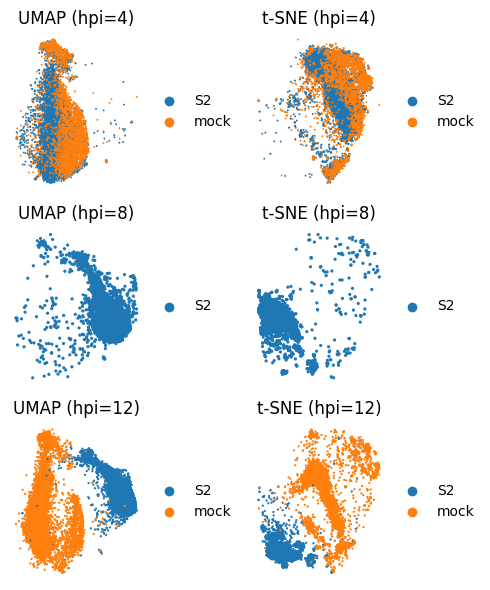

In [45]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(5, 6))

sc.pl.umap(adata[adata.obs['hpi'] == '4'], frameon=False, ax=axs[0, 0], color=["condition"], title="UMAP (hpi=4)", show=False) 
sc.pl.tsne(adata[adata.obs['hpi'] == '4'], frameon=False, ax=axs[0, 1], color=["condition"], title="t-SNE (hpi=4)", show=False)

sc.pl.umap(adata[adata.obs['hpi'] == '8'], frameon=False, ax=axs[1, 0], color=["condition"], title="UMAP (hpi=8)", show=False)
sc.pl.tsne(adata[adata.obs['hpi'] == '8'], frameon=False, ax=axs[1, 1], color=["condition"], title="t-SNE (hpi=8)", show=False)

sc.pl.umap(adata[adata.obs['hpi'] == '12'], frameon=False, ax=axs[2, 0], color=["condition"], title="UMAP (hpi=12)", show=False) 
sc.pl.tsne(adata[adata.obs['hpi'] == '12'], frameon=False, ax=axs[2, 1], color=["condition"], title="t-SNE (hpi=12)", show=False)

plt.tight_layout()
plt.show()



/opt/homebrew/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.

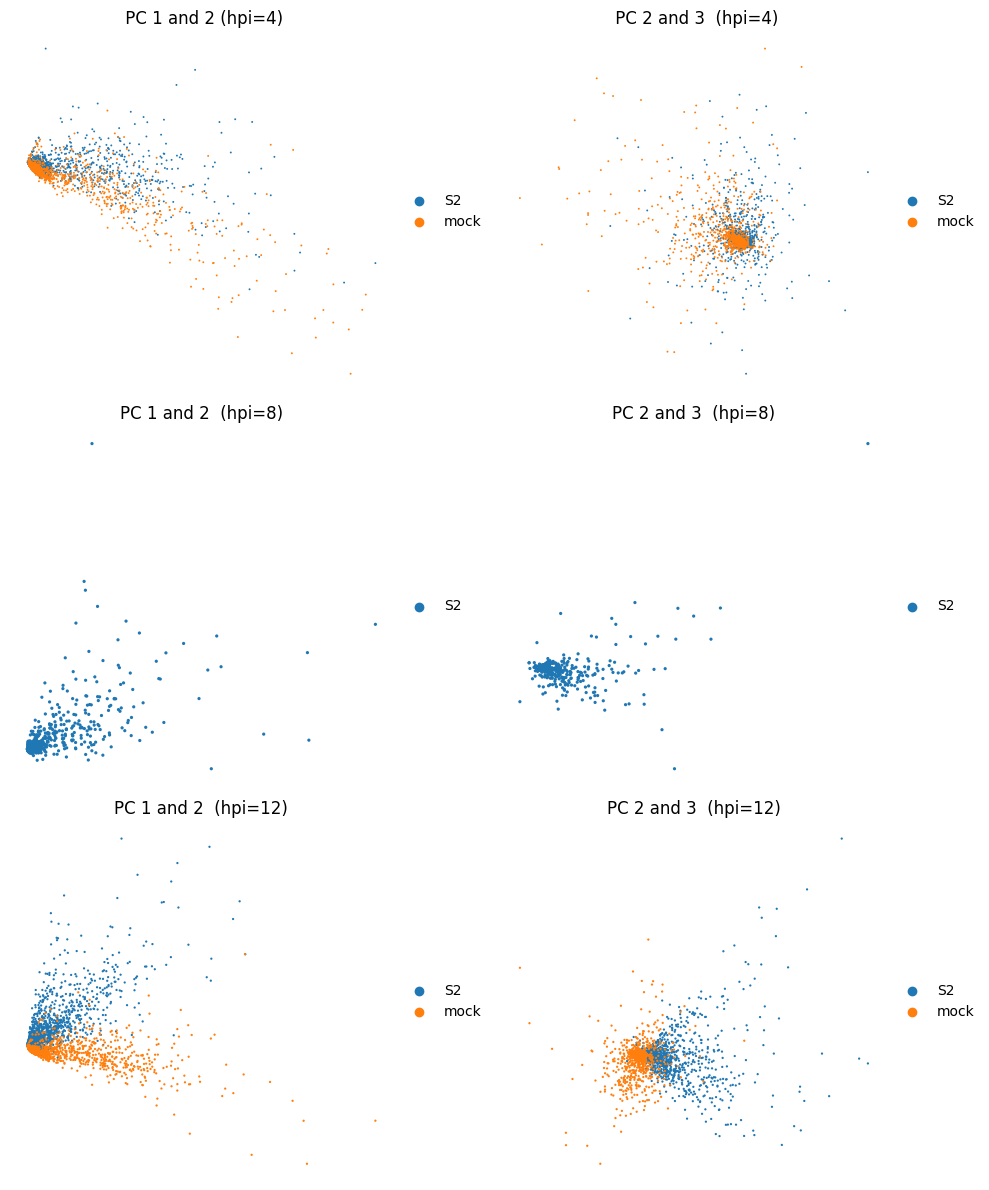

In [24]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(10, 12))

sc.pl.pca(adata[adata.obs['hpi'] == '4'], frameon=False, ax=axs[0, 0],  components = ['1,2'], color=["condition"], title=" PC 1 and 2 (hpi=4)", show=False) 
sc.pl.pca(adata[adata.obs['hpi'] == '4'], frameon=False, ax=axs[0, 1],  components = ['2,3'], color=["condition"], title=" PC 2 and 3  (hpi=4)", show=False)

sc.pl.pca(adata[adata.obs['hpi'] == '8'], frameon=False, ax=axs[1, 0],  components = ['1,2'], color=["condition"], title="PC 1 and 2  (hpi=8)", show=False)
sc.pl.pca(adata[adata.obs['hpi'] == '8'], frameon=False, ax=axs[1, 1],  components = ['2,3'], color=["condition"], title="PC 2 and 3  (hpi=8)", show=False)

sc.pl.pca(adata[adata.obs['hpi'] == '12'], frameon=False, ax=axs[2, 0],  components = ['1,2'], color=["condition"], title="PC 1 and 2  (hpi=12)", show=False) 
sc.pl.pca(adata[adata.obs['hpi'] == '12'], frameon=False, ax=axs[2, 1],  components = ['2,3'], color=["condition"], title="PC 2 and 3  (hpi=12)", show=False)

plt.tight_layout()
plt.show()

/opt/homebrew/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.

<AxesSubplot: title={'center': 'PC 2 and 3  (hpi=12)'}, xlabel='PC2', ylabel='PC3'>

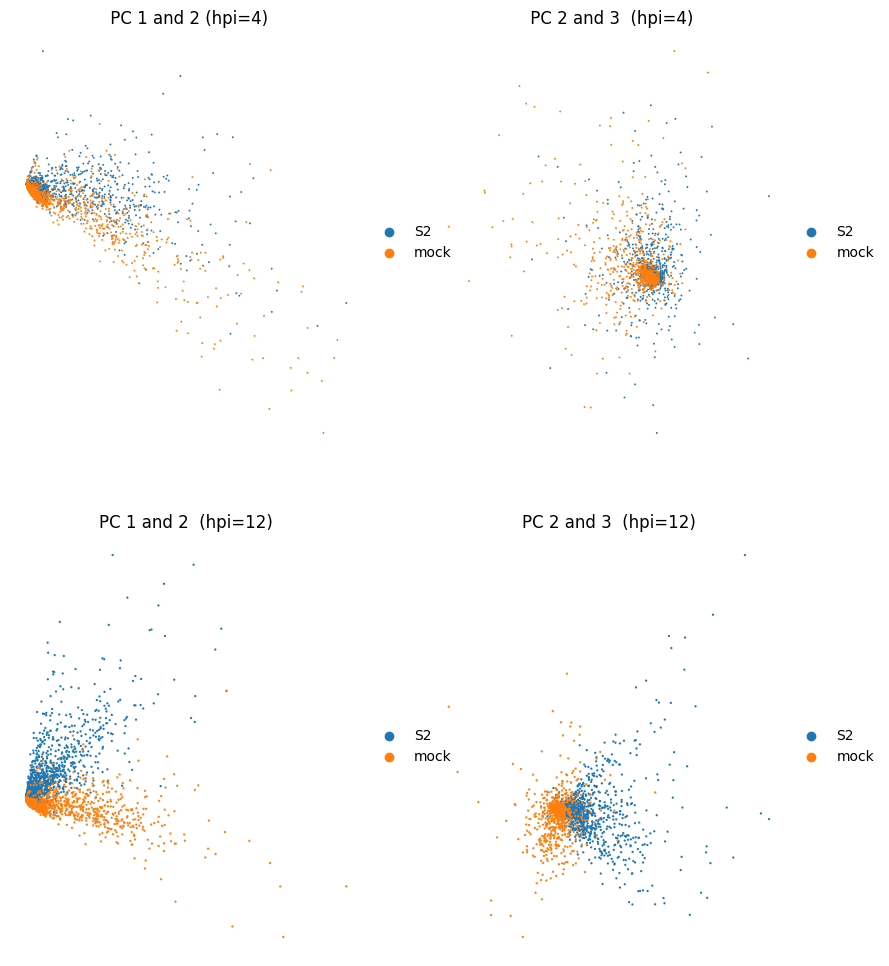

In [25]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 12))
sc.pl.pca(adata[adata.obs['hpi'] == '4'], frameon=False, ax=axs[0, 0],  components = ['1,2'], color=["condition"], title=" PC 1 and 2 (hpi=4)", show=False) 
sc.pl.pca(adata[adata.obs['hpi'] == '4'], frameon=False, ax=axs[0, 1],  components = ['2,3'], color=["condition"], title=" PC 2 and 3  (hpi=4)", show=False)
sc.pl.pca(adata[adata.obs['hpi'] == '12'], frameon=False, ax=axs[1, 0],  components = ['1,2'], color=["condition"], title="PC 1 and 2  (hpi=12)", show=False)
sc.pl.pca(adata[adata.obs['hpi'] == '12'], frameon=False, ax=axs[1, 1],  components = ['2,3'], color=["condition"], title="PC 2 and 3  (hpi=12)", show=False)

/opt/homebrew/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<AxesSubplot: title={'center': ' PC 2 and 3  (hpi=4)'}, xlabel='PC2', ylabel='PC3'>

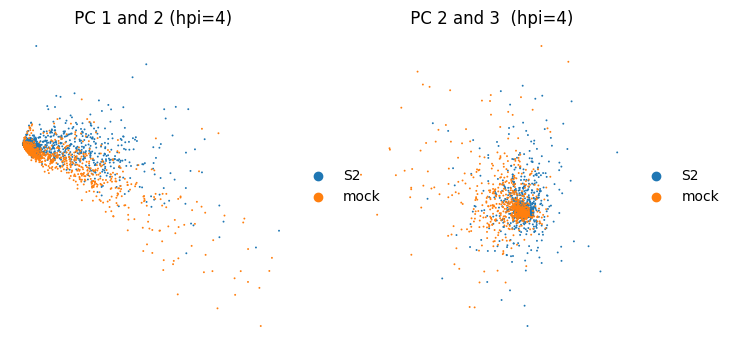

In [26]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8, 4))

sc.pl.pca(adata[adata.obs['hpi'] == '4'], frameon=False, ax=axs[0],  components = ['1,2'], color=["condition"], title=" PC 1 and 2 (hpi=4)", show=False) 
sc.pl.pca(adata[adata.obs['hpi'] == '4'], frameon=False, ax=axs[1],  components = ['2,3'], color=["condition"], title=" PC 2 and 3  (hpi=4)", show=False)


Text(0.5, 0.98, 'PCA plot for hpi=12')

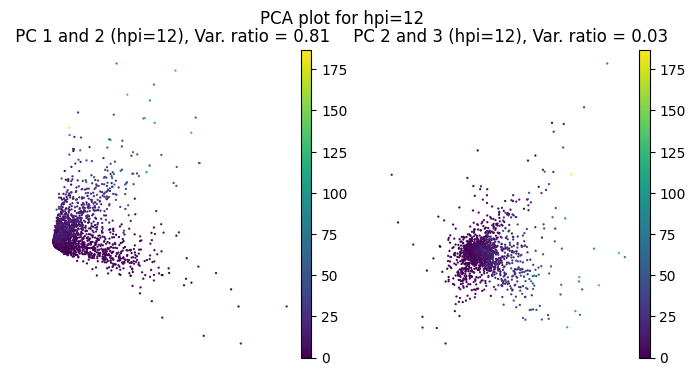

In [43]:
import scanpy as sc
import matplotlib.pyplot as plt

gene = 'ENSG00000115267'
# define the figure and axes objects
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8, 4))

# plot the first subplot
pca_12 = sc.pl.pca(adata[adata.obs['hpi'] == '12'], frameon=False, ax=axs[0],  components = ['1,2'], color=[gene], title=" PC 1 and 2 (hpi=12), Var. ratio = {:.2f}".format(adata.uns['pca']['variance_ratio'][0]), show=False) 

# plot the second subplot
pca_23 = sc.pl.pca(adata[adata.obs['hpi'] == '12'], frameon=False, ax=axs[1],  components = ['2,3'], color=[gene], title=" PC 2 and 3 (hpi=12), Var. ratio = {:.2f}".format(adata.uns['pca']['variance_ratio'][1]), show=False)

# add a main title for the entire plot
fig.suptitle("PCA plot for hpi=12")

In [ ]:
gene = 'ENSG00000115267'
ENSG00000152778
# define the figure and axes objects
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8, 4))

# plot the first subplot
pca_12 = sc.pl.pca(adata[adata.obs['hpi'] == '12'], frameon=False, ax=axs[0],  components = ['1,2'], color=[gene], title=" PC 1 and 2 (hpi=12), Var. ratio = {:.2f}".format(adata.uns['pca']['variance_ratio'][0]), show=False) 

# plot the second subplot
pca_23 = sc.pl.pca(adata[adata.obs['hpi'] == '12'], frameon=False, ax=axs[1],  components = ['2,3'], color=[gene], title=" PC 2 and 3 (hpi=12), Var. ratio = {:.2f}".format(adata.uns['pca']['variance_ratio'][1]), show=False)

# add a main title for the entire plot
fig.suptitle("PCA plot for hpi=12")

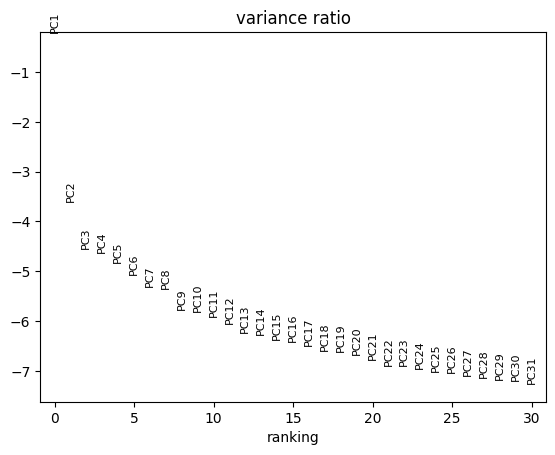

In [46]:
# plot the elbow plot
sc.pl.pca_variance_ratio(adata[adata.obs['hpi'] == '4'], log=True)

In [47]:
adata.var.index

Index(['ENSG00000146038', 'ENSG00000136536', 'ENSG00000116679',
       'ENSG00000160360', 'ENSG00000165282', 'ENSG00000023330',
       'ENSG00000105371', 'ENSG00000171234', 'ENSG00000117242',
       'ENSG00000258279',
       ...
       'ENSG00000137760', 'ENSG00000004534', 'ENSG00000025423',
       'ENSG00000164543', 'ENSG00000073578', 'ENSG00000163596',
       'ENSG00000224152', 'ENSG00000145388', 'ENSG00000038219',
       'ENSG00000181513'],
      dtype='object', name='feature_id', length=16210)

In [48]:
ens = adata.var.index
import mygene
mg = mygene.MyGeneInfo()
geneSyms = mg.querymany(ens, scopes='ensembl.gene') # annotate ensembl symbols

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-16210...done.
Finished.
24 input query terms found no hit:
	['ENSG00000256222', 'ENSG00000204092', 'ENSG00000112096', 'ENSG00000225932', 'ENSG00000168078', 'ENS
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


In [49]:
genes = pd.DataFrame(geneSyms) 

In [50]:
genes

,query,_id,_score,entrezgene,name,symbol,taxid,notfound
0,ENSG00000146038,51473,25.040188,51473,doublecortin domain containing 2,DCDC2,9606.0,NaN
1,ENSG00000136536,64844,24.613790,64844,membrane associated ring-CH-type finger 7,MARCHF7,9606.0,NaN
2,ENSG00000116679,10625,24.507853,10625,influenza virus NS1A binding protein,IVNS1ABP,9606.0,NaN
3,ENSG00000160360,26086,24.505430,26086,G protein signaling modulator 1,GPSM1,9606.0,NaN
4,ENSG00000165282,84720,24.111992,84720,phosphatidylinositol glycan anchor biosynthesi...,PIGO,9606.0,NaN
...,...,...,...,...,...,...,...,...
16205,ENSG00000163596,130026,25.147470,130026,islet cell autoantigen 1 like,ICA1L,9606.0,NaN
16206,ENSG00000224152,643072,25.826210,643072,BAZ2B antisense RNA 1,BAZ2B-AS1,9606.0,NaN
16207,ENSG00000145388,57721,23.791737,57721,"methyltransferase 14, N6-adenosine-methyltrans...",METTL14,9606.0,NaN
16208,ENSG00000038219,259282,24.112068,259282,biorientation of chromosomes in cell division ...,BOD1L1,9606.0,NaN


In [51]:
adata.var.index = genes['query']

In [52]:
adata.var.feature_name

query
ENSG00000146038         DCDC2
ENSG00000136536       MARCHF7
ENSG00000116679      IVNS1ABP
ENSG00000160360         GPSM1
ENSG00000165282          PIGO
                      ...    
ENSG00000163596         ICA1L
ENSG00000224152    AC009506.1
ENSG00000145388       METTL14
ENSG00000038219        BOD1L1
ENSG00000181513         ACBD4
Name: feature_name, Length: 16210, dtype: category
Categories (16210, object): ['A1BG', 'A1CF', 'A2M-AS1', 'A4GALT', ..., 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3']

In [54]:
enr8 = pd.read_csv('/Users/sofialuk/Desktop/thesis/Calu3/calu3_GSEA/Calu3_DEGs_12h_enr_Reactome_up.csv')

In [69]:
enr8

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2022,Cytokine Signaling In Immune System R-HSA-1280215,205/702,1.668996e-36,2.683745e-33,0,0,3.255700,2.682073e+02,IFITM3;IFITM1;IL1RN;IFITM2;IFIT5;UBE2L6;IFI35;...
1,Reactome_2022,Immune System R-HSA-168256,397/1943,2.724374e-30,2.190396e-27,0,0,2.087439,1.421031e+02,CYFIP2;PGLYRP2;C4BPB;RNF115;TBK1;MYC;AP1S3;PRS...
2,Reactome_2022,Interferon Signaling R-HSA-913531,77/200,2.828051e-22,1.515835e-19,0,0,4.767858,2.365681e+02,IFITM3;IFITM1;CIITA;IFITM2;IFIT5;UBE2L6;ADAR;I...
3,Reactome_2022,Interferon Alpha/Beta Signaling R-HSA-909733,38/72,3.412083e-17,1.371657e-14,0,0,8.412721,3.189820e+02,IFITM3;IFITM1;RNASEL;IFITM2;IFIT5;IFI6;ADAR;IF...
4,Reactome_2022,Signaling By Interleukins R-HSA-449147,118/453,4.482909e-17,1.441704e-14,0,0,2.698365,1.015764e+02,IL1RN;CSF2;CSF1;IRS1;IRS2;ICAM1;IL27RA;TBK1;RP...
...,...,...,...,...,...,...,...,...,...,...
1603,Reactome_2022,Regulation Of Insulin Secretion R-HSA-422356,2/77,9.993336e-01,9.999956e-01,0,0,0.197219,1.314779e-04,GNB4;ITPR2
1604,Reactome_2022,Neuronal System R-HSA-112316,26/386,9.997298e-01,9.999956e-01,0,0,0.530829,1.434272e-04,ACHE;CAMK2D;NLGN2;RASGRF2;SLC22A1;SLC1A1;SLC1A...
1605,Reactome_2022,Integration Of Energy Metabolism R-HSA-163685,2/105,9.999713e-01,9.999956e-01,0,0,0.143377,4.118532e-06,GNB4;ITPR2
1606,Reactome_2022,Sensory Perception R-HSA-9709957,11/616,9.999940e-01,9.999956e-01,0,0,0.130903,7.895693e-07,RIPOR2;TTR;AKR1B10;EPB41L1;SCN9A;AKR1C3;SDC1;A...


In [101]:
enr8['Genes'][0]

'IFITM3;IFITM1;IL1RN;IFITM2;IFIT5;UBE2L6;IFI35;IFIT1;IFIT3;ICAM1;IFIT2;IL27RA;HERC5;MT2A;TBK1;RPS6KA5;MYC;RPS6KA2;TRIM25;IL12A;TRIM26;LGALS9;B2M;TRIM21;TRIM22;GBP6;MEF2A;GBP5;IL15RA;MEF2C;GBP7;RSAD2;FLT3LG;IFI27;PSME1;PSME2;TRIM14;ALPK1;PIK3R3;GATA3;N4BP1;GSDMD;LYN;CCR1;STAT5A;EGR1;JUN;TNFSF14;TNFSF15;FN1;LIF;EIF2AK2;IL22RA1;BST2;SDC1;CDKN1A;CD40;RPLP0;TRIM5;ELOB;ARIH1;JAK2;DUSP4;ANXA2;SYK;RIPK2;IL15;IFNGR2;FOS;GAB2;IL17RE;OSMR;IL17RC;IL17RB;PSMA6;IL1A;ZEB1;IL1B;PELI1;RNASEL;SP100;PELI3;PELI2;IFI6;PTGS2;TANK;RELB;PSMB6;PSMB5;PSMB3;ALOX5;IL32;RANBP2;CCL22;CCL20;STAT1;IFNB1;STAT2;VEGFA;PSMC4;NEDD4;SAA2;PKN2;IL17C;IL18R1;CSF2;CSF1;IRS1;IRS2;MAP3K8;KPNA5;KPNA2;IFNAR2;KCNH8;LIFR;PRLR;MAPKAPK3;IL6ST;PSMD10;RNASEH2A;UBA7;TNFRSF11B;FOXO1;NUP160;SOCS3;BCL2L11;SOCS1;PDZD2;UBB;IRAK2;ABL2;TNFRSF14;MAP2K6;MCL1;SMAD3;VCAM1;TNFRSF9;ISG15;NFKB1;NFKB2;SMAD7;ISG20;NFKBIA;CXCL10;IL6;IL7;HLA-DRA;TAB3;XAF1;MAP3K14;MYD88;RIGI;CIITA;ITGAM;CXCL8;ADAR;CXCL1;CXCL2;TNFSF13B;OASL;CASP8;BLNK;CASP1;TNFRSF1B;CREB1;P

In [151]:
enr8

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2022,Cytokine Signaling In Immune System R-HSA-1280215,205/702,1.668996e-36,2.683745e-33,0,0,3.255700,2.682073e+02,IFITM3;IFITM1;IL1RN;IFITM2;IFIT5;UBE2L6;IFI35;...
1,Reactome_2022,Immune System R-HSA-168256,397/1943,2.724374e-30,2.190396e-27,0,0,2.087439,1.421031e+02,CYFIP2;PGLYRP2;C4BPB;RNF115;TBK1;MYC;AP1S3;PRS...
2,Reactome_2022,Interferon Signaling R-HSA-913531,77/200,2.828051e-22,1.515835e-19,0,0,4.767858,2.365681e+02,IFITM3;IFITM1;CIITA;IFITM2;IFIT5;UBE2L6;ADAR;I...
3,Reactome_2022,Interferon Alpha/Beta Signaling R-HSA-909733,38/72,3.412083e-17,1.371657e-14,0,0,8.412721,3.189820e+02,IFITM3;IFITM1;RNASEL;IFITM2;IFIT5;IFI6;ADAR;IF...
4,Reactome_2022,Signaling By Interleukins R-HSA-449147,118/453,4.482909e-17,1.441704e-14,0,0,2.698365,1.015764e+02,IL1RN;CSF2;CSF1;IRS1;IRS2;ICAM1;IL27RA;TBK1;RP...
...,...,...,...,...,...,...,...,...,...,...
1603,Reactome_2022,Regulation Of Insulin Secretion R-HSA-422356,2/77,9.993336e-01,9.999956e-01,0,0,0.197219,1.314779e-04,GNB4;ITPR2
1604,Reactome_2022,Neuronal System R-HSA-112316,26/386,9.997298e-01,9.999956e-01,0,0,0.530829,1.434272e-04,ACHE;CAMK2D;NLGN2;RASGRF2;SLC22A1;SLC1A1;SLC1A...
1605,Reactome_2022,Integration Of Energy Metabolism R-HSA-163685,2/105,9.999713e-01,9.999956e-01,0,0,0.143377,4.118532e-06,GNB4;ITPR2
1606,Reactome_2022,Sensory Perception R-HSA-9709957,11/616,9.999940e-01,9.999956e-01,0,0,0.130903,7.895693e-07,RIPOR2;TTR;AKR1B10;EPB41L1;SCN9A;AKR1C3;SDC1;A...


In [103]:
gene_list = enr8['Genes'][0].split(';')  # defense response to virus (GO:0051607) 

genes_str = ','.join(gene_list)
genes_list = genes_str.split(',')
pathway1 = adata.var[adata.var.feature_name.isin(genes_list)].index

IL1RN


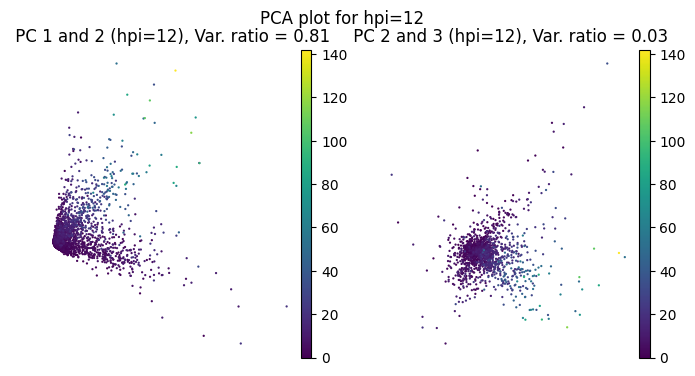

In [111]:
import scanpy as sc
import matplotlib.pyplot as plt

gene = pathway1[4]
# define the figure and axes objects
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8, 4))

# plot the first subplot
pca_12 = sc.pl.pca(adata[adata.obs['hpi'] == '12'], frameon=False, ax=axs[0],  
                   components = ['1,2'], color=[gene], 
                   title=" PC 1 and 2 (hpi=12), Var. ratio = {:.2f}".format(adata.uns['pca']['variance_ratio'][0]),
                   show=False) 

# plot the second subplot
pca_23 = sc.pl.pca(adata[adata.obs['hpi'] == '12'], frameon=False, ax=axs[1],
                   components = ['2,3'], color=[gene], 
                   title=" PC 2 and 3 (hpi=12), Var. ratio = {:.2f}".format(adata.uns['pca']['variance_ratio'][1]),
                   show=False)

# add a main title for the entire plot
fig.suptitle("PCA plot for hpi=12")
print(genes_list[2])

In [150]:
pathway1

Index(['ENSG00000101843', 'ENSG00000172936', 'ENSG00000185885',
       'ENSG00000184557', 'ENSG00000115415', 'ENSG00000169429',
       'ENSG00000008517', 'ENSG00000130303', 'ENSG00000184371',
       'ENSG00000101017',
       ...
       'ENSG00000163823', 'ENSG00000125735', 'ENSG00000111331',
       'ENSG00000120738', 'ENSG00000106785', 'ENSG00000068079',
       'ENSG00000168310', 'ENSG00000068305', 'ENSG00000185950',
       'ENSG00000114738'],
      dtype='object', name='query', length=204)

In [1]:
cmap = 'plasma'
gene_list = enr8['Genes'][0].split(';')

for i in range(len(genes_list)):
    fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(5, 6))
    

    genes_str = ','.join(gene_list)
    genes_list = genes_str.split(',')
    pathway1 = adata.var[adata.var.feature_name.isin(genes_list)].index

    plt.suptitle('Expression of {} in Calu-3 cells over the course of infection'.format(genes_list[i]))

    sc.pl.umap(adata[adata.obs['hpi'] == '4'], 
               frameon=False, ax=axs[0, 0],
               color=pathway1[i],
               title="UMAP hpi=4, gene = {}".format(genes_list[i]),
               show=False,
               palette="RaYIGn",
               color_map=plt.colormaps[cmap]) 


    sc.pl.tsne(adata[adata.obs['hpi'] == '4'],
               frameon=False, ax=axs[0, 1],
               color=pathway1[i],
               title="t-SNE hpi=4, gene = {}".format(genes_list[i]),
                #palette="YlOrBr",
               color_map=plt.colormaps[cmap],
               show=False)

    sc.pl.umap(adata[adata.obs['hpi'] == '8'],
               frameon=False, ax=axs[1, 0],
               color=pathway1[i],
               title="UMAP hpi=8, gene = {}".format(genes_list[i]),
                #palette="YlOrBr",
               color_map=plt.colormaps[cmap],
               show=False)

    sc.pl.tsne(adata[adata.obs['hpi'] == '8'],
               frameon=False, ax=axs[1, 1],
               color=pathway1[i],
               title="t-SNE hpi=8, gene = {}".format(genes_list[i]),
               #palette="YlOrBr",
               color_map=plt.colormaps[cmap],
               show=False)

    sc.pl.umap(adata[adata.obs['hpi'] == '12'],
               frameon=False, ax=axs[2, 0],
               color=pathway1[i],
               title="UMAP hpi=12, gene = {}".format(genes_list[i]),
                                     #palette="YlOrBr",
               color_map=plt.colormaps[cmap],
               show=False) 

    sc.pl.tsne(adata[adata.obs['hpi'] == '12'],
               frameon=False, ax=axs[2, 1],
               color=pathway1[i], 
               title="t-SNE hpi=12, gene = {}".format(genes_list[i]),
                          #palette="YlOrBr",
               color_map=plt.colormaps[cmap],
               show=False)

    plt.tight_layout()
    plt.savefig('{}.png'.format(genes_list[i]), dpi=300, bbox_inches='tight')



NameError: name 'enr8' is not defined